In [1]:
import pandas as pd 
import numpy as np 
import re
import string
import nltk
nltk.download('stopwords')
from nltk import word_tokenize, FreqDist
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jeffe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


link para baixar o arquivo do kaggle - https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [2]:
data = pd.read_csv("IMDB Dataset.csv")

data


review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]

In [3]:
def remove_padrao(sentenca):
    patterns = ["(<).*(>)", "[.,;:'!@#$%¨&*()-_=+./*"]
    for x in patterns:
        sentenca = re.sub(x, "",sentenca)
    return sentenca


In [4]:
# criando a função para tokenizar texto
def tokenizaTexto(x) :
  # Criando uma lista para receber a saida com o texto já 'tokenizado'
  saida = []
  # Gerando um padrão para a expressão regular ser aplicada
  padrao = "([a-zA-Z]+(?:'[a-z]+)?)"
  # Criando uma lista com as Stop Words, números e pontos
  listaStopWords = stopwords.words('english')
  listaStopWords += list(string.punctuation)
  listaStopWords += ['0','1','2','3','4','5','6','8','9']

  # Percorrendo o texto passado.
  for txt in x:
    # Alocando o texto com a primeira filtragem.
    txt_tokens_raw = nltk.regexp_tokenize(txt, padrao)
    # Padronizando o texto
    txt_tokens_min =[palavra.lower() for palavra in txt_tokens_raw]
    # Retirando simbolos e números.
    txt_words_stopped = [palavra for palavra in txt_tokens_min if palavra not in listaStopWords]
    saida.append(txt_words_stopped)
  # Gerando a saída com o texto tokenizado
  return pd.Series(saida)



In [5]:
token = tokenizaTexto(data['review'])

In [6]:
token

0        [one, reviewers, mentioned, watching, oz, epis...
1        [wonderful, little, production, br, br, filmin...
2        [thought, wonderful, way, spend, time, hot, su...
3        [basically, there's, family, little, boy, jake...
4        [petter, mattei's, love, time, money, visually...
                               ...                        
49995    [thought, movie, right, good, job, creative, o...
49996    [bad, plot, bad, dialogue, bad, acting, idioti...
49997    [catholic, taught, parochial, elementary, scho...
49998    [i'm, going, disagree, previous, comment, side...
49999    [one, expects, star, trek, movies, high, art, ...
Length: 50000, dtype: object

In [7]:
lista_frases = [palavra for frase in token for palavra in frase]


In [8]:
from nltk.probability import FreqDist


In [9]:
tokens_freq = FreqDist(lista_frases)
tokens_freq.most_common(50)


[('br', 201954),
 ('movie', 87163),
 ('film', 77758),
 ('one', 53092),
 ('like', 40172),
 ('good', 29747),
 ('time', 25094),
 ('even', 24872),
 ('would', 24234),
 ('really', 23094),
 ('story', 23015),
 ('see', 23007),
 ('well', 21267),
 ('much', 19320),
 ('bad', 18473),
 ('get', 18370),
 ('great', 18144),
 ('also', 17977),
 ('people', 17868),
 ('first', 17583),
 ('made', 16152),
 ('make', 15890),
 ('way', 15644),
 ('movies', 15306),
 ('could', 15217),
 ('characters', 14451),
 ('think', 14338),
 ('watch', 13947),
 ('films', 13752),
 ('two', 13540),
 ('many', 13445),
 ('seen', 13375),
 ('character', 13327),
 ('never', 12981),
 ('love', 12978),
 ('plot', 12957),
 ('acting', 12855),
 ('life', 12808),
 ('best', 12609),
 ('know', 12492),
 ('show', 12448),
 ('little', 12434),
 ('ever', 12028),
 ('better', 11430),
 ('man', 11157),
 ('end', 11119),
 ('scene', 10921),
 ('still', 10859),
 ('say', 10765),
 ('scenes', 10482)]

In [10]:
#!pip install wordcloud

In [11]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [12]:
join_text = " ".join(frase for frase in lista_frases)


In [13]:
import matplotlib.pyplot as plt

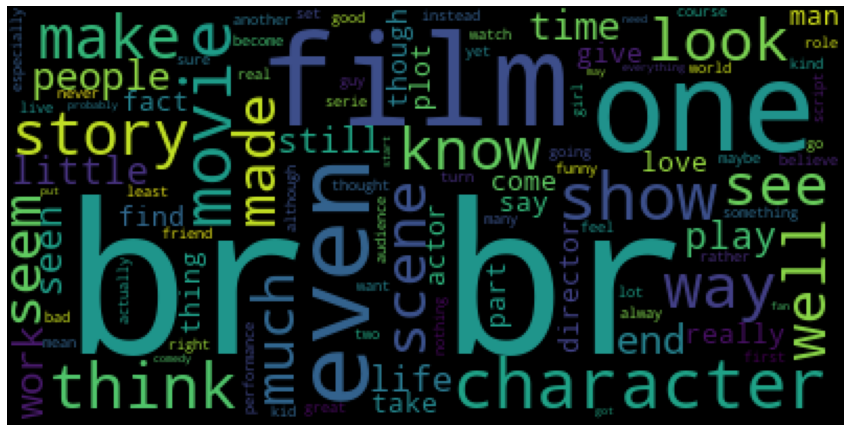

In [14]:
w = WordCloud(max_words=100).generate(join_text)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(w)
plt.show()

In [15]:
#!pip install gensim

In [16]:
from gensim.models import Word2Vec

In [17]:
#w2v = Word2Vec(token, window=10, min_count=10, workers=4 )

In [18]:
#w2v.train(token, total_examples=w2v.corpus_count, epochs=100)

In [19]:
#w2v_ = dict(zip(w2v.wv.index_to_key, w2v.wv.vectors))

In [20]:
#w2v.wv.vectors

In [21]:
#w2v.wv.most_similar('film')

In [22]:
import networkx as nx
import pandas as pd
import regex as re
import nltk
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from nltk.stem.snowball import SnowballStemmer

In [23]:
def tsne_plot(model):
  "Creates and TSNE model and plots it"
  labels = []
  tokens = []

  for word in model.wv.index_to_key:
    tokens.append(model.wv[word])
    labels.append(word)

  tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
  new_values = tsne_model.fit_transform(tokens)

  x = []
  y = []
  for value in new_values:
    x.append(value[0])
    y.append(value[1])

#plt.scatter(new_values[0],new_values[1])

  plt.figure(figsize=(32, 32)) 
  for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
              xy=(x[i], y[i]),
              xytext=(5, 2),
              textcoords='offset points',
              ha='right',
              va='bottom')
  plt.show()

In [24]:
#tsne_plot(w2v)

In [25]:
#!pip install pyvis

In [26]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

max_features = 20000  # Only consider the top 20k words
maxlen = 200  # Only consider the first 200 words of each movie review

In [27]:
y = pd.get_dummies(data['sentiment'], drop_first=True)


In [28]:
vocabulary_size = 20000
tokenizer = keras.preprocessing.text.Tokenizer(num_words= vocabulary_size, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n')
tokenizer.fit_on_texts(data['review'])

In [29]:
X = tokenizer.texts_to_sequences(data.review)

In [30]:
X[0]

[27,
 4,
 1,
 79,
 2102,
 45,
 1072,
 12,
 100,
 147,
 39,
 307,
 3184,
 398,
 474,
 26,
 3195,
 33,
 23,
 203,
 14,
 11,
 6,
 621,
 48,
 596,
 16,
 68,
 7,
 7,
 1,
 86,
 148,
 12,
 3241,
 68,
 42,
 3184,
 13,
 92,
 5398,
 2,
 15115,
 134,
 4,
 570,
 60,
 268,
 8,
 203,
 36,
 1,
 661,
 139,
 1740,
 68,
 11,
 6,
 21,
 3,
 119,
 15,
 1,
 7888,
 2333,
 38,
 11469,
 11,
 119,
 2595,
 54,
 5911,
 16,
 5510,
 5,
 1479,
 376,
 38,
 570,
 92,
 6,
 3804,
 8,
 1,
 360,
 356,
 4,
 1,
 661,
 7,
 7,
 9,
 6,
 433,
 3184,
 14,
 12,
 6,
 1,
 11648,
 358,
 5,
 1,
 15701,
 6813,
 2538,
 1064,
 9,
 2711,
 1421,
 20,
 538,
 32,
 4636,
 2468,
 4,
 1,
 1208,
 117,
 29,
 1,
 7017,
 25,
 2970,
 11964,
 2,
 391,
 34,
 16740,
 6,
 21,
 299,
 20,
 1,
 4910,
 7364,
 538,
 6,
 344,
 5,
 106,
 8161,
 14813,
 5050,
 7889,
 2453,
 2,
 51,
 34,
 327,
 9106,
 7365,
 12486,
 2,
 8697,
 23,
 110,
 225,
 243,
 7,
 7,
 10,
 58,
 131,
 1,
 280,
 1324,
 4,
 1,
 119,
 6,
 693,
 5,
 1,
 192,
 12,
 9,
 269,
 117,
 79,
 276,
 58

In [31]:
# Input for variable-length sequences of integers
inputs = keras.Input(shape=(None,), dtype="int32")
# Embed each integer in a 128-dimensional vector
x = layers.Embedding(max_features, 128,name="embedding")(inputs)
# Add 2 bidirectional LSTMs
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Add a classifier
x = layers.Dense(1024, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding (Embedding)       (None, None, 128)         2560000   
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        98816     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 128)              98816     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1024)              132096    
                                                                 
 dense_1 (Dense)             (None, 1)                 1025  

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
x_train

[[196,
  48,
  10,
  800,
  2198,
  539,
  300,
  1,
  106,
  1862,
  2055,
  4492,
  6619,
  2,
  825,
  4999,
  12,
  1,
  12846,
  228,
  1,
  6095,
  81,
  780,
  53,
  50,
  22,
  101,
  4,
  1,
  27,
  2008,
  102,
  35,
  25,
  34,
  120,
  1127,
  12,
  9,
  6,
  2380,
  1189,
  5,
  458,
  48,
  555,
  5,
  93,
  33,
  23,
  39,
  934,
  407,
  15,
  1,
  164,
  5,
  2956,
  24,
  4634,
  20,
  3,
  2972,
  12,
  45,
  75,
  221,
  72,
  126,
  8,
  79,
  3191,
  195,
  20,
  240,
  2,
  1,
  443,
  7,
  7,
  10,
  206,
  5020,
  145,
  21,
  62,
  27,
  15,
  14745,
  74,
  367,
  300,
  3,
  19,
  18,
  9,
  206,
  26,
  302,
  12,
  14,
  1,
  15979,
  11390,
  116,
  444,
  2,
  14,
  1,
  1637,
  10412,
  626,
  70,
  419,
  381,
  10,
  89,
  118,
  48,
  113,
  368,
  33,
  10980,
  36,
  18,
  43,
  10,
  13,
  93,
  482,
  6612,
  15,
  3,
  363,
  11817,
  1137,
  61,
  8,
  1,
  469,
  214,
  1019,
  5,
  4259,
  8,
  3,
  174,
  4,
  34,
  433,
  703,
  634,
  12,


In [34]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

In [35]:
x_train.shape

(40000, 200)

In [36]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir="logs")
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=5)

In [39]:
model.compile("adadelta", "binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=16, epochs=100,validation_split=0.1,callbacks=[tensorboard_callback,es])

Epoch 1/100
2250/2250 [==============================] - 247s 107ms/step - loss: 0.6929 - accuracy: 0.5058 - val_loss: 0.6930 - val_accuracy: 0.5040
Epoch 2/100
2250/2250 [==============================] - 227s 101ms/step - loss: 0.6929 - accuracy: 0.5066 - val_loss: 0.6929 - val_accuracy: 0.5082
Epoch 3/100
2020/2250 [=========================>....] - ETA: 20s - loss: 0.6929 - accuracy: 0.5126

KeyboardInterrupt: 

In [ ]:
model.evaluate(x=x_test,y=y_test)

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs